# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The research paper states that the data represents 17 marketing campaigns by a Portuguese bank related to high interest deposit product. The campaign ran from May 2008 till November 2010. It consists of 79,354 contacts. Apparently with 8% (6,499) success rate. Meaning, customers accepting the offer. 

However, the actual dataset contains only 41,188 entries (half of the advertised amount in the paper).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Check for missing/empty values

In [6]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No values are missing in the dataset.

#### Check for duplicate entries

In [7]:
df.duplicated().sum()

12

12 entries are duplicated. Let's drop them now.

In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

#### Check Features Statistics

In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41176.0,NaN,NaN,NaN,40.0238,10.42068,17.0,32.0,38.0,47.0,98.0
job,41176,12,admin.,10419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41176,4,married,24921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41176,8,university.degree,12164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41176,3,no,32577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41176,3,yes,21571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41176,3,no,33938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41176,2,cellular,26135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41176,10,may,13767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41176,5,thu,8618,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Render Histogram Plot from all the columns

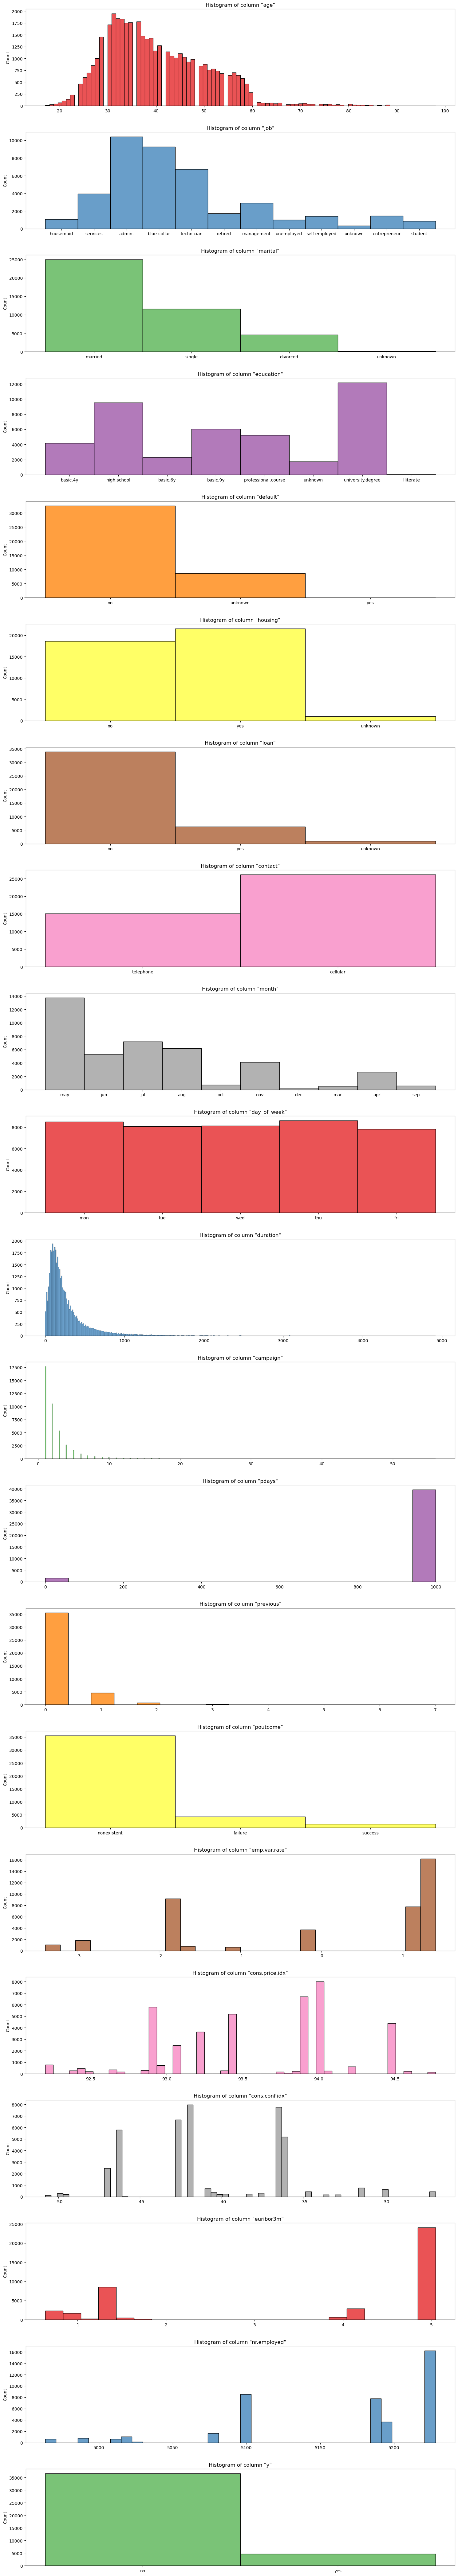

In [10]:
# Number of columns
num_columns = len(df.columns)

# Set Seaborn color palette
palette = sns.color_palette(palette = 'Set1', n_colors = num_columns)

# Create subplots
fig, axes = plt.subplots(nrows = num_columns, ncols = 1, figsize = (15, 4 * num_columns))

# Loop through each column and create a histogram in the corresponding subplot
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax = axes[i], color = palette[i])
    axes[i].set_title(f'Histogram of column "{column}"')
    axes[i].set_xlabel('') # We already mention column's name in the title. 

plt.tight_layout(h_pad = 3) # Add padding between the subplots
plt.show()

#### Analysis of Numerical Columns

##### Column - `age`

`age` is a bit skewed to right and probably quite important feature. We can easily fix it with log() transform.

In [11]:
df['age_log'] = np.log(df['age'])
df[['age', 'age_log']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.02380,10.420680,17.000000,32.000000,38.000000,47.000000,98.000000
age_log,41176.0,3.65697,0.253881,2.833213,3.465736,3.637586,3.850148,4.584967


##### Column - `duration`

In [12]:
df['duration'].value_counts(bins = 4, normalize = True)

(-4.9190000000000005, 1229.5]    0.988756
(1229.5, 2459.0]                 0.010589
(2459.0, 3688.5]                 0.000583
(3688.5, 4918.0]                 0.000073
Name: proportion, dtype: float64

Column `duration` is extremely skewed to the right. We could potentially try log() transform. However the original authors recommend to drop this column anyway as it has a strong correlation with the target variable -- `y`.

In [13]:
df.drop(columns = ['duration'], inplace = True)

##### Column - `campaign`

In [14]:
df['campaign'].value_counts(bins = 5, normalize = True)

(0.944, 12.0]    0.986230
(12.0, 23.0]     0.011342
(23.0, 34.0]     0.002064
(34.0, 45.0]     0.000340
(45.0, 56.0]     0.000024
Name: proportion, dtype: float64

Column `campaign` is extremely skewed to the right. We could use log() transform. After transformation it still won't be ideal but slightly better.

In [15]:
df['campaign_log'] = np.log(df['campaign'])
df[['campaign', 'campaign_log']].describe().T

,count,mean,std,min,25%,50%,75%,max
campaign,41176.0,2.567879,2.770318,1.0,1.0,2.000000,3.000000,56.000000
campaign_log,41176.0,0.649912,0.692401,0.0,0.0,0.693147,1.098612,4.025352


##### Column - `pdays`

In [16]:
df['pdays'].value_counts(bins = 5, normalize = True)

(799.2, 999.0]    0.963207
(-1.0, 199.8]     0.036793
(199.8, 399.6]    0.000000
(399.6, 599.4]    0.000000
(599.4, 799.2]    0.000000
Name: proportion, dtype: float64

Column `pdays` is extremely skewed. Over 96% of values are `999` which means - client was not previously contacted. We could convert this column for example into binary categorical column (one-vs-all): `less than 100 days since last contact`, `no previous contact` and then encode it. However it would still be skewed with 96% of `no previous contact` values. I opt to drop it.

In [17]:
df.drop(columns = ['pdays'], inplace = True)

##### Column - `previous`

In [18]:
df['previous'].value_counts(bins = 7, normalize = True)

(-0.008, 1.0]    0.974160
(1.0, 2.0]       0.018312
(2.0, 3.0]       0.005246
(3.0, 4.0]       0.001700
(4.0, 5.0]       0.000437
(5.0, 6.0]       0.000121
(6.0, 7.0]       0.000024
Name: proportion, dtype: float64

This variable indicates number of contacts prior to this campaign. Over 97% of values are between 0.0 and 1.0. This can't be fixed by log() transformation. This column should be dropped.

In [19]:
df.drop(columns = ['previous'], inplace = True)

##### Columns - `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`

These columns are national indexes and indicators of seasonal social and economical attributes present during when the call was made. They have domain specific values and hence weird distributions. They are possible candidates for removal but may play role in customer's decision making process. Let's use them as-is.  

In [20]:
df['emp.var.rate'].value_counts(bins = 10, normalize = True)

(0.92, 1.4]                     0.582621
(-1.96, -1.48]                  0.241767
(-0.52, -0.04]                  0.089664
(-2.92, -2.44]                  0.040363
(-3.4059999999999997, -2.92]    0.030163
(-1.48, -1.0]                   0.015422
(-2.44, -1.96]                  0.000000
(-1.0, -0.52]                   0.000000
(-0.04, 0.44]                   0.000000
(0.44, 0.92]                    0.000000
Name: proportion, dtype: float64

#### Analysis of Categorical Columns

Generally they all will be encoded to numerical encoding later during Feature Engineering stage.

#### Column - `job`

In [21]:
df['job'].value_counts(normalize = True)

job
admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: proportion, dtype: float64

In [22]:
# OCD - rename `admin.` to `admin`
df['job'] = df['job'].replace({'admin.': 'admin'})

##### Column - `marital`

In [23]:
df['marital'].value_counts(normalize = True)

marital
married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: proportion, dtype: float64

##### Column - `education`

In [24]:
df['education'].value_counts(normalize = True)

education
university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: proportion, dtype: float64

##### Column - `default`

In [25]:
df['default'].value_counts(normalize = True)

default
no         0.791165
unknown    0.208762
yes        0.000073
Name: proportion, dtype: float64

##### Column - `housing`

In [26]:
df['housing'].value_counts(normalize = True)

housing
yes        0.523873
no         0.452084
unknown    0.024043
Name: proportion, dtype: float64

##### Column - `loan`

In [27]:
df['loan'].value_counts(normalize = True)

loan
no         0.824218
yes        0.151739
unknown    0.024043
Name: proportion, dtype: float64

##### Column - `contact`

In [28]:
df['contact'].value_counts(normalize = True)

contact
cellular     0.634714
telephone    0.365286
Name: proportion, dtype: float64

##### Column - `month`

In [29]:
df['month'].value_counts(normalize = True)

month
may    0.334345
jul    0.174106
aug    0.149990
jun    0.129153
nov    0.099573
apr    0.063896
oct    0.017413
sep    0.013843
mar    0.013260
dec    0.004420
Name: proportion, dtype: float64

##### Column `day_of_week`

In [30]:
df['day_of_week'].value_counts(normalize = True)

day_of_week
thu    0.209297
mon    0.206722
wed    0.197542
tue    0.196377
fri    0.190062
Name: proportion, dtype: float64

This column is remarkably evenly distributed.

##### Column - `poutcome`

In [31]:
df['poutcome'].value_counts(normalize = True)

poutcome
nonexistent    0.863391
failure        0.103264
success        0.033345
Name: proportion, dtype: float64

##### Finally Target Column - `y`

In [32]:
df['y'].value_counts(normalize = True)

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

Unfortunately our target variable is not evenly distributed.

### Summary of Findings 
* Based on the original author's description of the variables, column `duration` seems irrelevant and should be dropped. Not to mention one call went for almost 1.5hrs. 
* 12 entries are duplicated and will need to be dropped (preserving one of them).
* Categorical values should be encoded with numerical values.
* 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions